In [1]:
import sys
sys.path.append('/home/jhernandez/Work//')
sys.path.append('/home/jhernandez/Work/python_tools/')

from defaults import *

## Hovmoller of WMOP Hindcast V-velocity

#### Velocities during 2014 are c

In [24]:
from tqdm import tqdm

In [63]:
# Create list of datetimes for year 2014
days = [(datetime(2014,1,1) + timedelta(days=i)) for i in range(365) ]

# Create empty matrix with velocities for Hovmoller
u_glorys = np.empty((len(days),35))
v_glorys = np.empty((len(days),35))

u_mfs = np.empty((len(days),35))
v_mfs = np.empty((len(days),35))

for i in tqdm( range(len(days)) ):
    
    day = days[i]
    
    # Get WMOP Hindcast Glorys v1 Data
    f = F"/home/modelling/data/WMOP/WMOP_HINDCAST/Outputs/HINDCAST_GLORYS_v1/{day.strftime('%Y/%m/%d')}/roms_WMOP_HINDCAST_{day.strftime('%Y%m%d')}_avg.nc"
    ds = xr.open_dataset(f)

    # Get velocities for selected transect (Ibiza Channel - glider endurance line)
    u_glorys[i,:] = ds.u[0,-1,203,255:290].values
    v_glorys[i,:] = ds.v[0,-1,203,255:290].values
    
    # Get WMOP Hindcast MFS v17 Data
    f = F"/home/modelling/data/WMOP/WMOP_HINDCAST/Outputs/HINDCAST_MFS_v17/{day.strftime('%Y/%m/%d')}/roms_WMOP_HINDCAST_{day.strftime('%Y%m%d')}_avg.nc"
    ds = xr.open_dataset(f)
    
    u_mfs[i,:] = ds.u[0,-1,203,255:290].values
    v_mfs[i,:] = ds.v[0,-1,203,255:290].values

100%|██████████| 365/365 [01:42<00:00,  3.54it/s]


### Plot Hovmoller of V-velocity. Transect selected at lat=38.77N (Ibiza Channel)

In [69]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [76]:
lons = ds.lon_v[203,255:290].values
lats = ds.lat_v[203,255:290].values

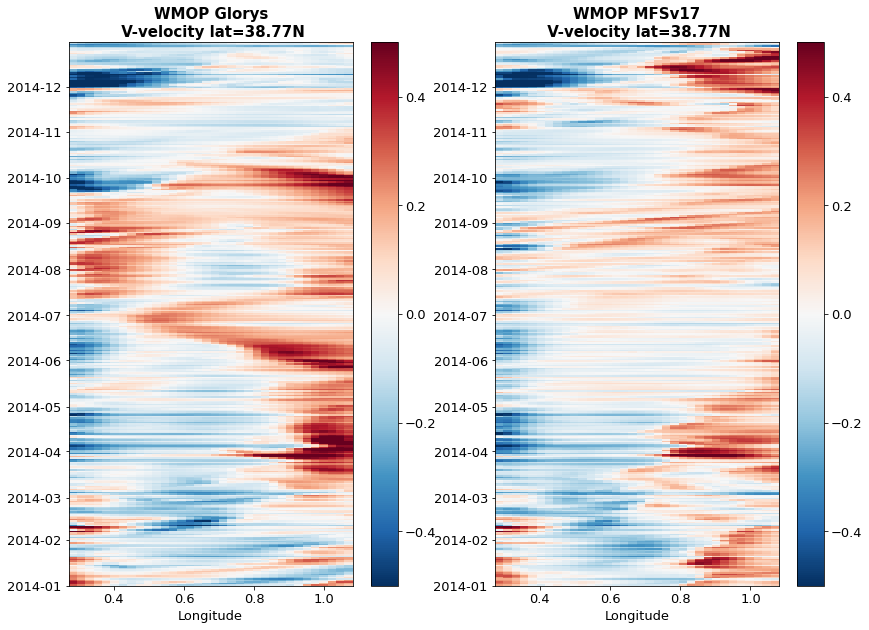

In [74]:
fig = plt.figure(figsize=(14, 10))

plt.subplot(1,2,1)
plt.pcolormesh(lons, days, v_glorys, vmin=-0.5, vmax=0.5, cmap='RdBu_r')
plt.colorbar()
plt.title('WMOP Glorys\n V-velocity lat=38.77N', fontsize=15, fontweight='bold')
plt.xlabel('Longitude')

plt.subplot(1,2,2)
plt.pcolormesh(lons, days, v_mfs, vmin=-0.5, vmax=0.5, cmap='RdBu_r')
plt.colorbar()
plt.title('WMOP MFSv17\n V-velocity lat=38.77N', fontsize=15, fontweight='bold')
plt.xlabel('Longitude')
plt.show()

In [75]:
fig.savefig('/home/jhernandez/Escritorio/OSSE_glorys_3h/v-velocity_hovmoller_IbizaChannel_2014.png', dpi=250, transparent=False, facecolor="w")